## Kody


In [1]:
import numpy as np
from scipy.integrate import solve_ivp, odeint
import matplotlib.pyplot as plt
from ipywidgets import interactive, fixed
from IPython.display import Image, HTML, display

In [2]:
def ARC(t, z, m_1, m_2, b_1, b_2, c_1, c_2):
    x, y = z

    dx_dt = -m_1 * x + b_1 + c_1 * np.arctan(y)
    dy_dt = -m_2 * y + b_2 + c_2 * np.arctan(x)

    return [dx_dt, dy_dt]

In [3]:
def rozw_ARC(x_0, y_0, m_1, m_2, b_1, b_2, c_1, c_2, n=-1, ax=None, xlabel="x(t)", ylabel="y(t)", sizes=(-10, 10),
):
    x0, y0 = x_0, y_0
    initial_conditions = [x0, y0]

    t_span = (0, 5)
    t_eval = np.linspace(0, 5, 200)

    solution = solve_ivp(
        ARC,
        t_span,
        initial_conditions,
        args=(m_1, m_2, b_1, b_2, c_1, c_2),
        t_eval=t_eval,
    )

    if ax is None:
        ax = plt.gca()

    ax.plot(solution.t, solution.y[0], label=xlabel, color="olivedrab")
    ax.plot(solution.t, solution.y[1], label=ylabel, color="hotpink")
    ax.set_ylim(sizes[0], sizes[1])
    ax.set_xlabel("Czas t")
    ax.set_ylabel("Wartości")
    ax.legend()
    ax.grid()
    if n >= 0:
        ax.set_title(f"Wyk {n} \n Stan emocjonalny aktorów w czasie")
    else:
        ax.set_title(f"Stan emocjonalny aktorów w czasie")

## Wykres Interaktywny

In [4]:
interactive_plot = interactive(
    rozw_ARC,
    x_0=(-5.0, 5.0, 0.1),
    y_0=(-5.0, 5.0, 0.1),
    m_1=(0.0, 5.0, 0.1),
    m_2=(0.0, 5.0, 0.1),
    b_1=(-5.0, 5.0, 0.1),
    b_2=(-2.0, 2.0, 0.1),
    c_1=(-5.0, 5.0, 0.1),
    c_2=(-5.0, 5.0, 0.1),
    n=fixed(-1),
    ax=fixed(None),
    xlabel=fixed("x(t)"),
    ylabel=fixed("y(t)"),
    sizes=fixed((-6, 6)),
)
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='x_0', max=5.0, min=-5.0), FloatSlider(value=0.0, des…

## Syndrom Sztokholmski


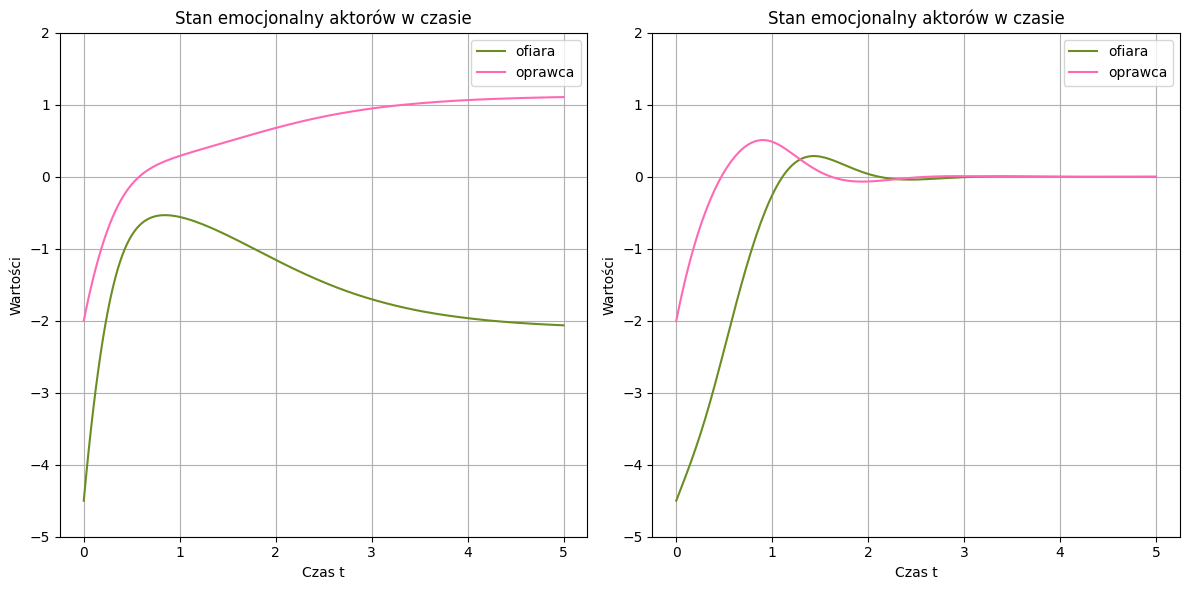

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

rozw_ARC(-4.5, -2, 2, 2, 0, 0, -5, -2, ax=axes[0], xlabel="ofiara", ylabel="oprawca", sizes=(-5, 2),
)
rozw_ARC(-4.5, -2, 2, 2, 0, 0, 5, -2, ax=axes[1], xlabel="ofiara", ylabel="oprawca", sizes=(-5, 2),
)

plt.tight_layout()
plt.show()

### animacja

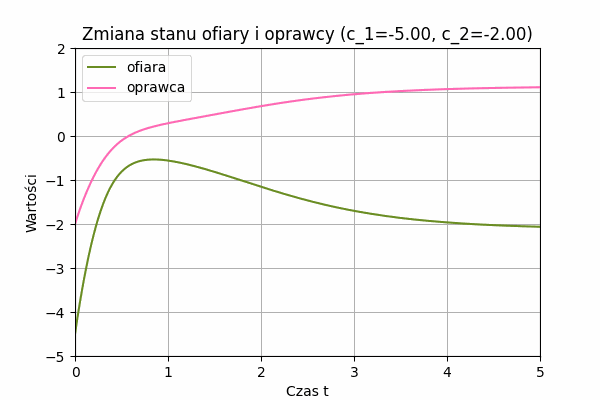

In [6]:
Image("sztokholm_animacja.gif")

TEKST O TYM JAKIE WARTOŚCI WYBIERAMY DLA OFIARY I OPRAWCY W TYM MODELU


## Relacja Rodzic-Dziecko


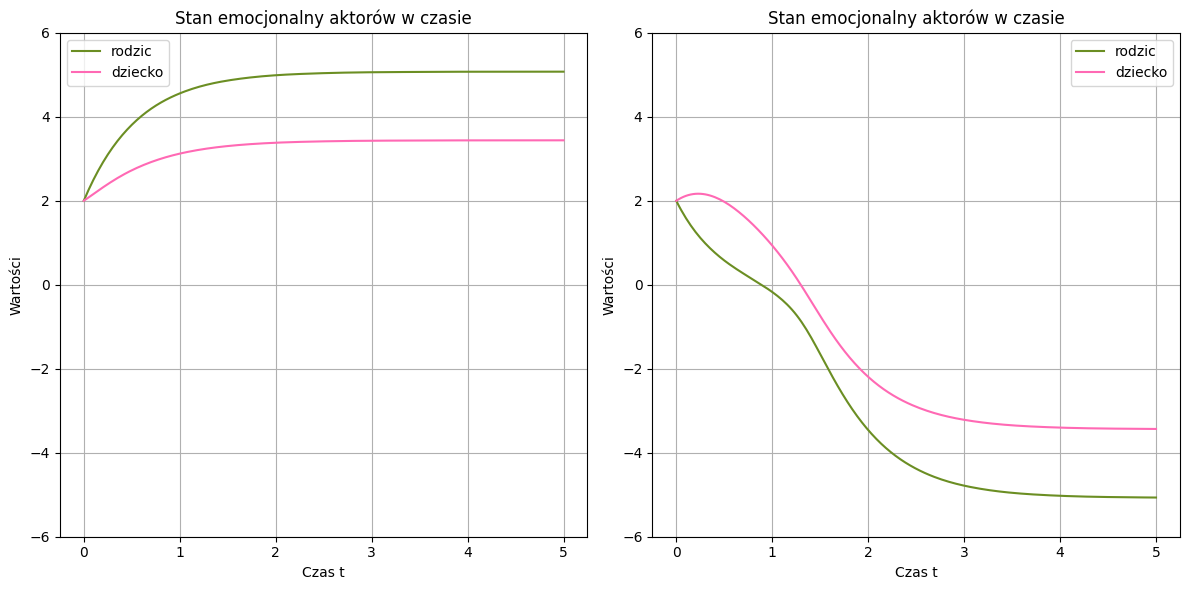

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

rozw_ARC(
    2, 2, 2, 2, 5, 0, 4, 5, ax=axes[0], xlabel="rodzic", ylabel="dziecko", sizes=(-6, 6)
)
rozw_ARC(2, 2, 2, 2, -5, 0, 4, 5, ax=axes[1], xlabel="rodzic", ylabel="dziecko", sizes=(-6, 6),
)

plt.tight_layout()
plt.show()

### animacja

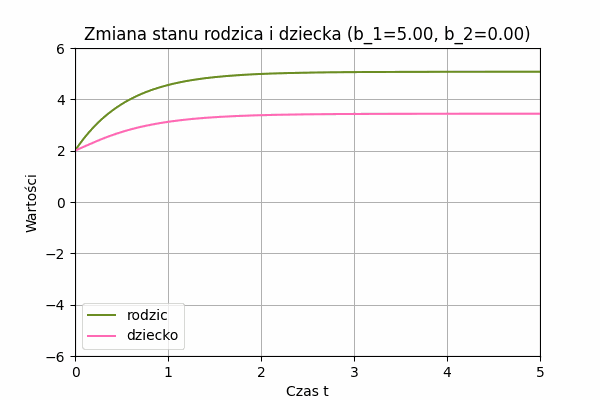

In [8]:
Image("rodzic_dziecko_animacja.gif")

TEKST O TYM JAKIE WARTOŚCI WYBIERAMY DLA RODZICA I DZIECKA W TYM MODELU
